# Машинное обучение, DS-поток, осень 2022
## Задание 3.2


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 4 баллов;
* Задача 2 &mdash; 3 баллов;
* Задача 3 &mdash; 12 баллов.

----

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

import mnist_reader
from warnings import filterwarnings
filterwarnings('ignore')
from umap.umap_ import UMAP
from umap import umap_
from sklearn.decomposition import PCA

### Задача 1

Пусть $X_1 , ..., X_n$ &mdash; выборка в пространстве $\mathbb{R}^D$ , а $Y_1, ..., Y_n$ &mdash; ее проекция на линейное подпространство размерности $d < D$. Докажите, что величина
$$\sum_{i=1}^{n} (X_i - Y_i)^2$$
минимальна, если $Y_1, ..., Y_n$ &mdash; проекция на линейное подпространство, образованное первыми $d$ главными компонентами. 

Чему она равна?

---
### Задача 2

Fashion-MNIST — набор данных изображений одежды, обуви и аксессуаров, состоящий из обучающего набора из 60 000 изображений и тестового набора из 10 000 изображений. Каждое изображение имеет размер 28x28 пикселей в оттенках серого.

Скачайте <a href="https://github.com/zalandoresearch/fashion-mnist">репозиторий</a> и загрузите данные с помощью скрипта `utils/mnist_reader.py`.

In [324]:
X_train, y_train = mnist_reader.load_mnist(
    'fashion-mnist-master/data/fashion', kind='train'
)
X_test, y_test = mnist_reader.load_mnist(
    'fashion-mnist-master/data/fashion', kind='t10k'
)

Объединим все данные и зададим названия классов

In [325]:
np.vstack([X_train, X_test])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [326]:
data = np.array(np.vstack([X_train, X_test]), dtype=np.float64) / 255.0
target = np.hstack([y_train, y_test])
classes = [
    'Футболки/топы',
    'Брюки',
    'Свитеры',
    'Платья',
    'Пальто',
    'Сандалии',
    'Рубашки',
    'Кроссовки',
    'Сумки',
    'Сапоги'
]

Посмотрите на размер данных и напечатайте несколько изображений

In [327]:
data.shape

(70000, 784)

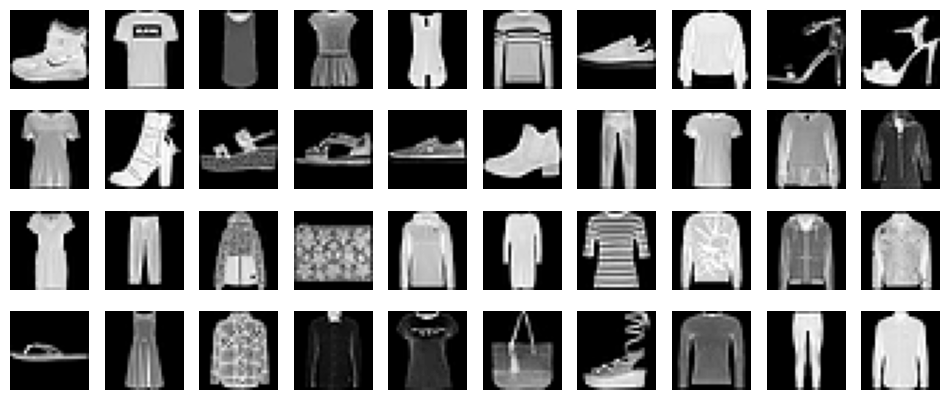

In [328]:
plt.figure(figsize=(12, 5))    
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(data[i].reshape((28, 28)), cmap='gray')
    plt.axis('off')

UMAP для сжатия в двумерное пространство. Не забывайте про особенности моделей и про смысл их гиперпараметров.

In [329]:
umap = UMAP(n_components=2)
umap.fit(data)
X_umap = umap.transform(data)

Визуализируйте полученные результаты. В качестве цвета точки используйте ее класс. Не забудьте добавить легенду или colorbar.

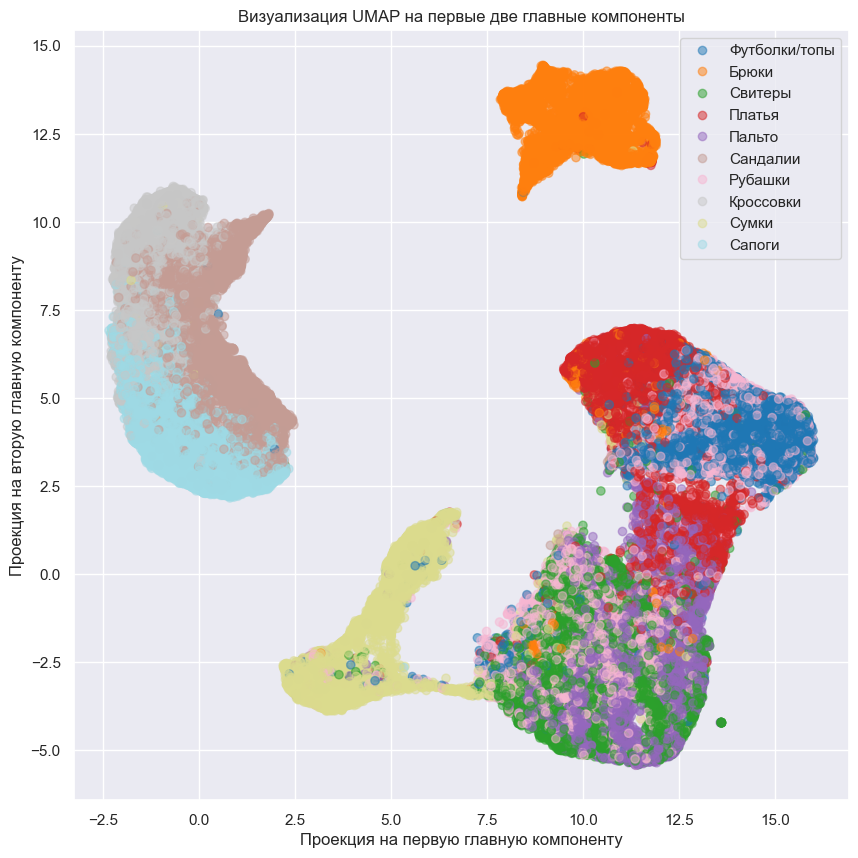

In [330]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(
    X_umap[:, 0], X_umap[:, 1],
    c=target, cmap='tab20', alpha=0.5
)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Визуализация UMAP на первые две главные компоненты')
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту');

Проинтерпретируйте полученные результаты. Удалось ли выделить кластеры? Что можно сказать про взаиморасположение кластеров в двумерном пространстве?

На графике хорошо видно несколько кластеров. Причем разбиты они логично: в одном кластере находятся предметы обуви (кроссовки, сандали, сапоги), в другом - брюки, в третьем - футболки, свитеры, платья, пальто, рубашки, то есть верхняя одежда и последний кластер соприкасается с предыдущим, в нем находятся сумки.

Обучите UMAP, передав ему также метки классов, и визуализируйте результаты. Как изменились результаты?

In [331]:
umap = UMAP(n_components=2)
X_umap_y = umap.fit_transform(data, y=target)

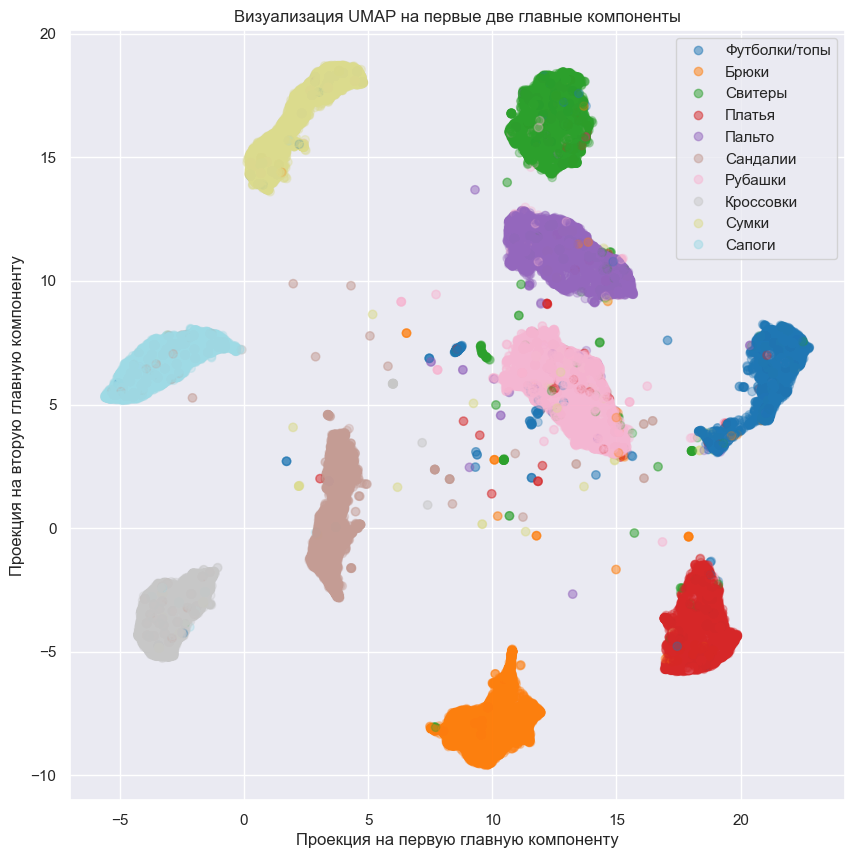

In [332]:
plt.figure(figsize=(10, 10))
plt.scatter(
    X_umap_y[:, 0], X_umap_y[:, 1],
    c=target, label=classes, cmap='tab20', alpha=0.3
)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Визуализация UMAP на первые две главные компоненты')
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту');

Здесь также можно видеть хорошее визуальное разделение на кластеры, только теперь каждый кластер представляет собой отдельный предмет гардероба.

Вывод: с помощью UMAP получилось хорошо кластеризовать наши данные сначала на похожие предметы одежды, а затем и вовсе на каждый тип одежды отдельно.

---
### Задача 3

Рассмотрим датасет **Leaf Classification**:
	
https://www.kaggle.com/c/leaf-classification
	
Данные содержат 1584 изображений образцов листьев (16 изображений для 99 видов). По ссылке доступно подробное описание данных. Для вашего удобства размер	некоторых изображении был изменен, в результате чего все изображения имеют одинаковый размер $170 \times 250$. 
* Скачайте файл с данными на сайте курса.
* Загрузите все изображения с помощью `plt.imread` и визуализируйте некоторые из них. Каждое изображение &mdash; матрица размера $170 \times 250$.
* В файле `train_labels.csv` указаны номера образцов листьев, которые относятся к обучающей части данных, а так же их виды. Разделите данные на обучающую и тестовую часть.
* На обучающей части данных постройте 30 главных компонент. Какую долю дисперсии данных они объясняют? Какую долю дисперсии объясняет каждая компонента отдельно?
* Визуализируйте главные компоненты. Можете ли вы их как-то охарактеризовать?
* Визуализируйте обучающую часть данных в проекции на две первых главных компоненты. Цвет точки должен соответствовать виду образца. Используйте `cmap=’Set1’` во избежании градации цвета по номеру вида. Наблюдаются ли какие-либо закономерности?
* Визуализируйте данные при помощи UMAP двумя способами — на основе исходных признаков (пиксели) и по проекциям на первые 30 главных компонент. Кластеризуются ли точки?


In [3]:
n_count = 1584
X = np.array([])
for i in range(1, n_count + 1):
    if (i == 1):
        X = plt.imread('Leaf_Images/scaled_images/{}.jpg'.format(i)).reshape(1, -1)
        continue
    X = np.vstack((X, plt.imread('Leaf_Images/scaled_images/{}.jpg'.format(i)).reshape(1, -1)))

In [4]:
X.shape

(1584, 42500)

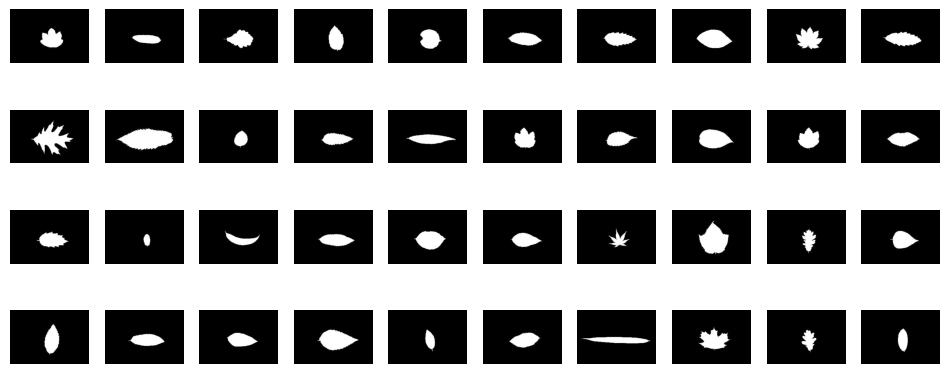

In [5]:
plt.figure(figsize=(12, 5))    
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(X[i].reshape((170, 250)), cmap='gray')
    plt.axis('off')

Загрузим файл с номерами листьев, которые должны быть в обучающей выборке.

In [6]:
train_info = pd.read_csv('Leaf_Images/train_labels.csv')

In [7]:
train_info

,id,species
0,1,Acer_Opalus
1,2,Pterocarya_Stenoptera
2,3,Quercus_Hartwissiana
3,5,Tilia_Tomentosa
4,6,Quercus_Variabilis
...,...,...
985,1575,Magnolia_Salicifolia
986,1578,Acer_Pictum
987,1581,Alnus_Maximowiczii
988,1582,Quercus_Rubra


In [8]:
train_info

,id,species
0,1,Acer_Opalus
1,2,Pterocarya_Stenoptera
2,3,Quercus_Hartwissiana
3,5,Tilia_Tomentosa
4,6,Quercus_Variabilis
...,...,...
985,1575,Magnolia_Salicifolia
986,1578,Acer_Pictum
987,1581,Alnus_Maximowiczii
988,1582,Quercus_Rubra


Разделим наши данные на обучающую и тестовую части.

In [9]:
X_train = X[np.array(train_info['id']) - 1, :]
X_test = X[np.array(list(set(np.arange(1, 1585)) - set(np.array(train_info['id'])))) - 1, :]

In [340]:
pca = PCA(n_components=30)
Y = pca.fit_transform(X_train)
X_hat = pca.inverse_transform(Y)

Доля объясненной дисперсии первыми 30 компонентами.

In [341]:
pca.explained_variance_ratio_.sum()

0.7764483818736967

Каждая компонента отдельно объясняет $i$ долю.

In [342]:
pca.explained_variance_ratio_

array([0.28663545, 0.13885536, 0.08681789, 0.04682911, 0.02789573,
       0.02444946, 0.0180767 , 0.01426323, 0.01149433, 0.01093779,
       0.0103892 , 0.00938562, 0.00827758, 0.0074885 , 0.00727361,
       0.00632603, 0.00569837, 0.00555027, 0.00549502, 0.00501506,
       0.00483431, 0.00471039, 0.00453982, 0.00424369, 0.00399189,
       0.00384813, 0.003577  , 0.00343391, 0.00308452, 0.00303043])

Визуализируем главные компоненты.

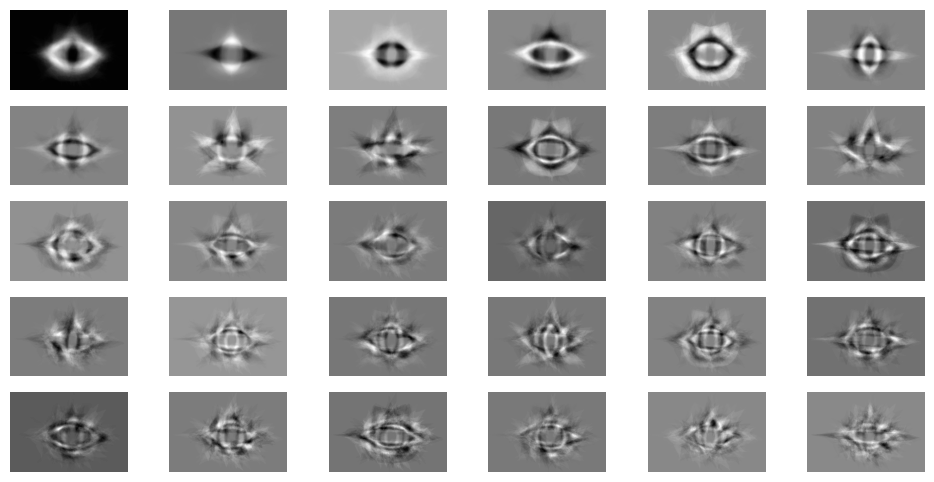

In [343]:
plt.figure(figsize=(12, 6))    
for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.imshow(pca.components_[i].reshape((170, 250)), cmap='gray')
    plt.axis('off')

По главным компонентам можно заметить, что исходные данные представляют собой какую-то картинку расположенную в центре, а по бокам будет однотонный фон.

Назначим каждому отдельному классу листьев, свое число.

In [344]:
types_of_leafs = {}
names_leafs = list(train_info['species'])
color = 0
for i in range(len(names_leafs)):
    if (names_leafs[i] not in types_of_leafs):
        types_of_leafs[names_leafs[i]] = color
        color += 1
types_of_leafs

{'Acer_Opalus': 0,
 'Pterocarya_Stenoptera': 1,
 'Quercus_Hartwissiana': 2,
 'Tilia_Tomentosa': 3,
 'Quercus_Variabilis': 4,
 'Magnolia_Salicifolia': 5,
 'Quercus_Canariensis': 6,
 'Quercus_Rubra': 7,
 'Quercus_Brantii': 8,
 'Salix_Fragilis': 9,
 'Zelkova_Serrata': 10,
 'Betula_Austrosinensis': 11,
 'Quercus_Pontica': 12,
 'Quercus_Afares': 13,
 'Quercus_Coccifera': 14,
 'Fagus_Sylvatica': 15,
 'Phildelphus': 16,
 'Acer_Palmatum': 17,
 'Quercus_Pubescens': 18,
 'Populus_Adenopoda': 19,
 'Quercus_Trojana': 20,
 'Alnus_Sieboldiana': 21,
 'Quercus_Ilex': 22,
 'Arundinaria_Simonii': 23,
 'Acer_Platanoids': 24,
 'Quercus_Phillyraeoides': 25,
 'Cornus_Chinensis': 26,
 'Liriodendron_Tulipifera': 27,
 'Cytisus_Battandieri': 28,
 'Rhododendron_x_Russellianum': 29,
 'Alnus_Rubra': 30,
 'Eucalyptus_Glaucescens': 31,
 'Cercis_Siliquastrum': 32,
 'Cotinus_Coggygria': 33,
 'Celtis_Koraiensis': 34,
 'Quercus_Crassifolia': 35,
 'Quercus_Kewensis': 36,
 'Cornus_Controversa': 37,
 'Quercus_Pyrenaica': 3

Визуализируем обущающую часть в проекции на две первые главные компоненты. Также цвет точки соответствует виду образца.

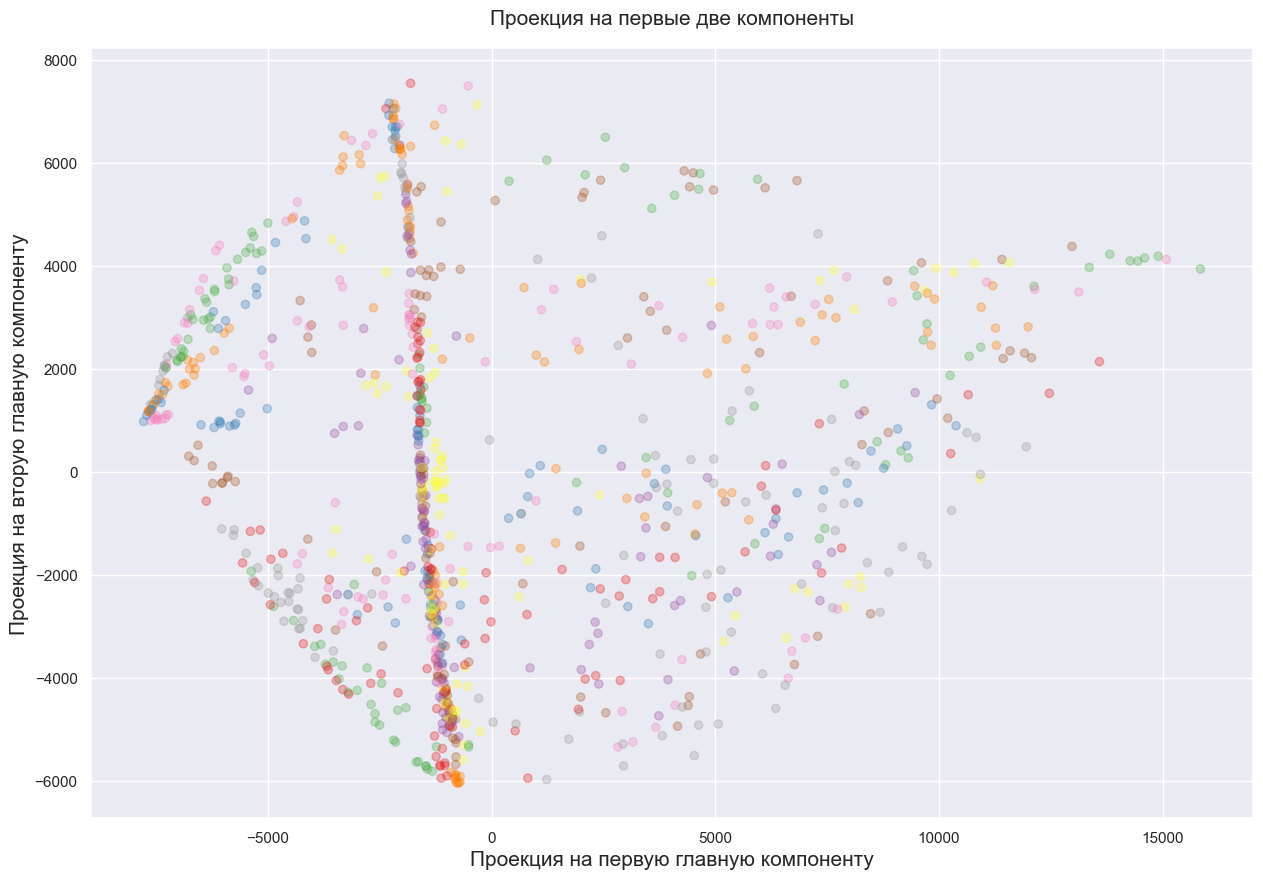

In [345]:
colors = list(map(lambda x: types_of_leafs[x], train_info['species']))

plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], c=colors, cmap='Set1', alpha=0.3)
plt.xlabel('Проекция на первую главную компоненту', fontsize=15)
plt.ylabel('Проекция на вторую главную компоненту', fontsize=15)
plt.title('Проекция на первые две компоненты', y=1.02, fontsize=15);

В целом на графике можно заметить один длинный ленточный кластер, но оставшиеся точки кластеров не образуют, их можно считать выбросами, но тогда большой информации этот график не несет.

Сейчас визуализируем данные при помощи UMAP двумя способами - на основе исходных признаков (пиксели) и по проекциям на первые 30 главных компонент.

In [346]:
umap = UMAP(n_components=2)
X_train_umap = umap.fit_transform(X_train)

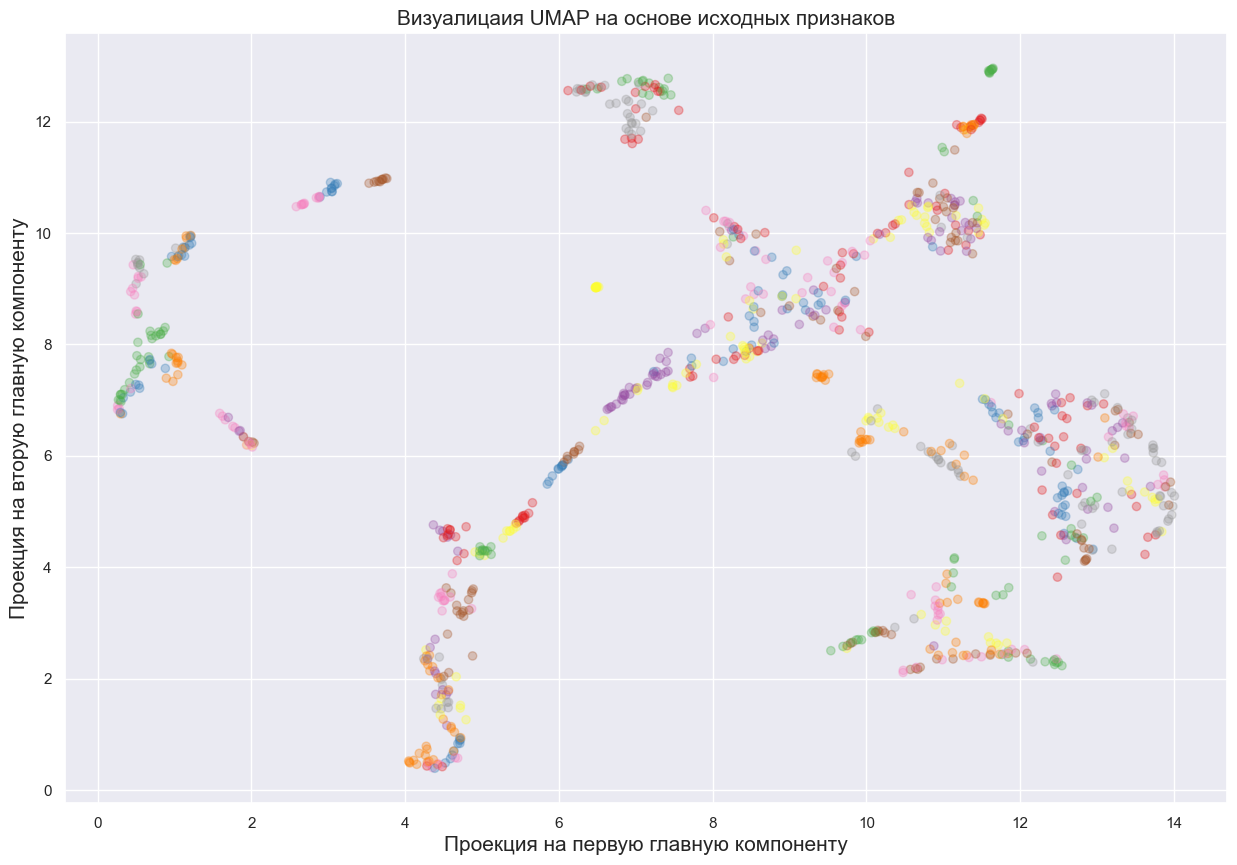

In [347]:
plt.figure(figsize=(15, 10))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=colors, cmap='Set1', alpha=0.3)
plt.title('Визуалицаия UMAP на основе исходных признаков', fontsize=15)
plt.xlabel('Проекция на первую главную компоненту', fontsize=15)
plt.ylabel('Проекция на вторую главную компоненту', fontsize=15);

На данном графике как и на предыдущем видно длинный ленточный кластер, но при этом оставшиеся данные также можно выделить в несколько разных кластеров. Мы не будем делать легенду, так как видов растений очень много и их назввания нам никакой информации не дают (так как мы не разбираемся в видах листьев), но можно предположить, что в длинном ленточном кластере находятся какие-то основные формы листьев, а в других кластерах - различные необычные формы листьев. Но это лишь предположение, поэтому оценить насколько хорошо данные кластеризовались не получится.

In [348]:
umap = UMAP(n_components=2)
Y_umap = umap.fit_transform(Y)

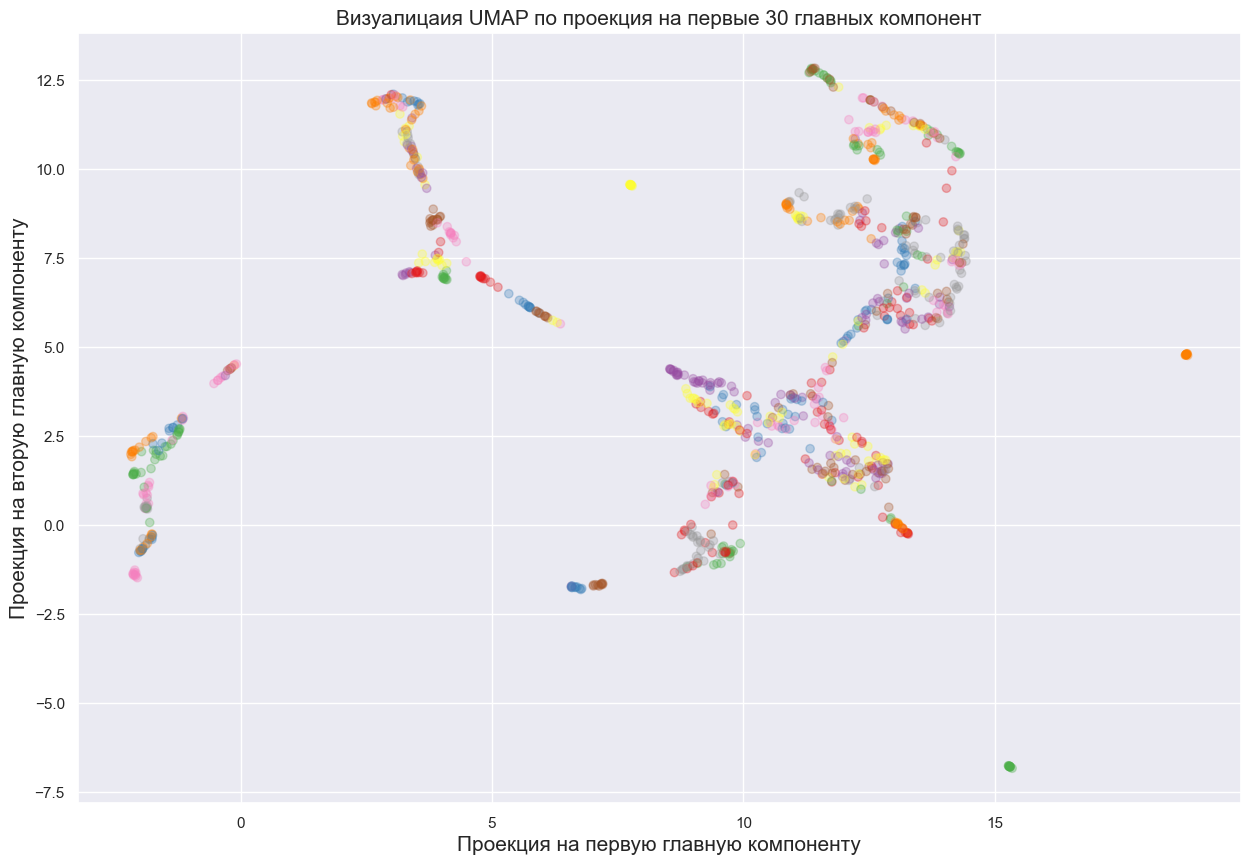

In [349]:
plt.figure(figsize=(15, 10))
plt.scatter(Y_umap[:, 0], Y_umap[:, 1], c=colors, cmap='Set1', alpha=0.3)
plt.title('Визуалицаия UMAP по проекция на первые 30 главных компонент', fontsize=15)
plt.xlabel('Проекция на первую главную компоненту', fontsize=15)
plt.ylabel('Проекция на вторую главную компоненту', fontsize=15);

На данном графике также можно выделить несколько кластеров, также есть перескающиеся кластеры. Но мы опять же не можем оценить как хорошо кластеризовались наши данные, а можем лишь предполагать, как в выводе под предыдущим графиком.

Здесь я попробовал применить UMAP на обучающих данных передав ему метки классов. Но здесь вообще не получается кластеризовать данные, видно лишь плотный сгусток посередине и оставшиеся точки разбросаны.

In [350]:
umap = UMAP(n_components=2)
test_umap = umap.fit_transform(X_train, colors)

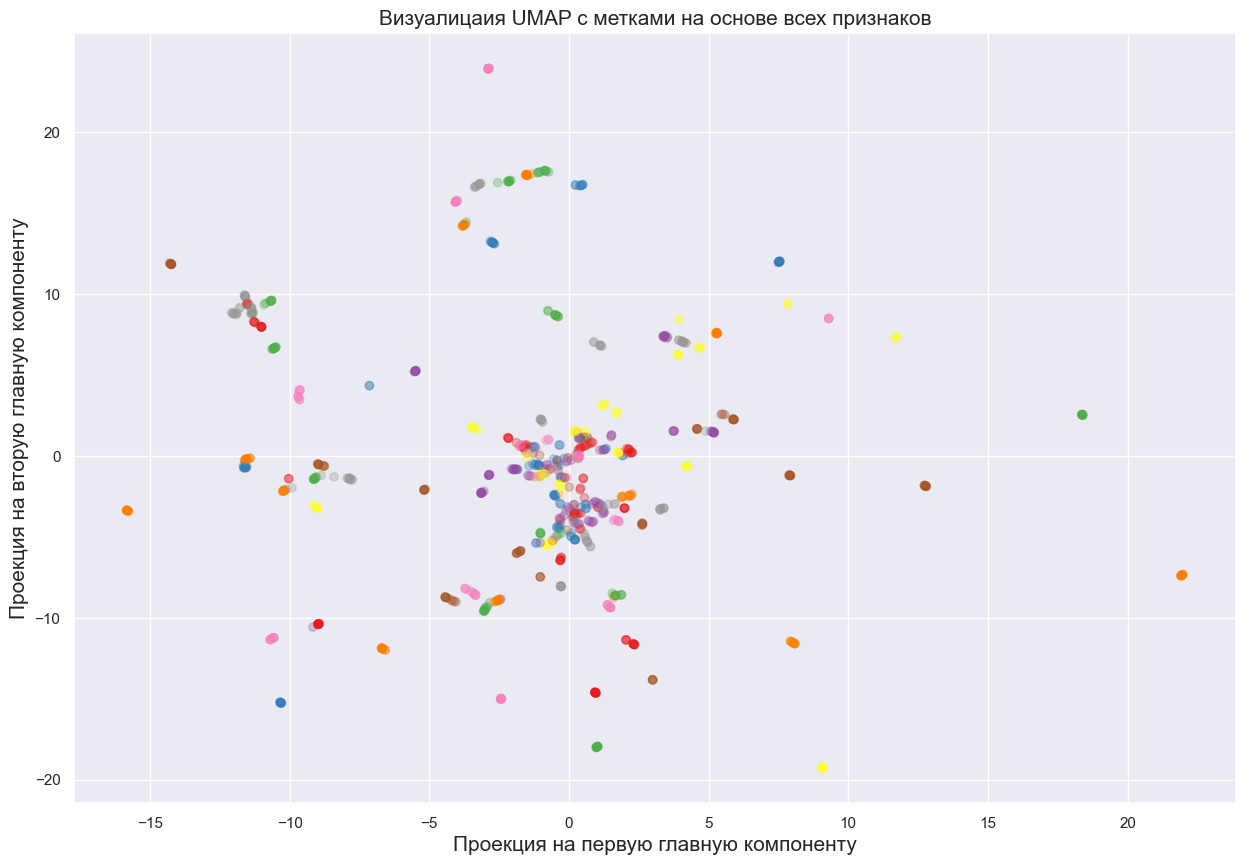

In [352]:
plt.figure(figsize=(15, 10))
plt.scatter(test_umap[:, 0], test_umap[:, 1], c=colors, cmap='Set1', alpha=0.3)
plt.title('Визуалицаия UMAP с метками на основе всех признаков', fontsize=15)
plt.xlabel('Проекция на первую главную компоненту', fontsize=15)
plt.ylabel('Проекция на вторую главную компоненту', fontsize=15);

Вывод: лучше всего кластеризовать данные получилось с помощью UMAP как на основе всех признаков, так и по проекциям на первые 30 главных компонент. С помощью PCA удалось выделить лишь один кластер и разбросанные точки. С помощью UMAP с метками не получилось выделить кластеры. Что лучше - UMAP на всех признаках или UMAP на проекциях сказать нельзя, так как мы не знаем какие именно растения находятся в клатерах и не знаем как разделить их на типы самим. Но при этом доля объясненной дисперсии PCA 30 главными компонентами - 0.776, то есть 77.6%, что довольно неплохо.